<a href="https://cognitiveclass.ai"><img src = "https://ibm.box.com/shared/static/9gegpsmnsoo25ikkbl4qzlvlyjbgxs5x.png" width = 400> </a>

<h1 align=center><font size = 5>CAPSTONE PROJECT: Segmenting and Clustering Neighborhoods in TORONTO, CA</font></h1>
<h2 align=center><font size = 5>Author: HongX</font></h2><h2 align=center><font size = 4>Student at ETH Zürich (2019)</font></h2>

# Introduction

In this notebook, I presented how to apply the knowledge learned from coursera data science courses to the tasks of segmenting and clustering neighborhoods in Toronto, Canada.  

List of used tools:  
**1.Python 3**  
**2.Foursqure**  
**3.Skills Network Labs Platform**  

*Adapted notebook from course: DP0701EN-3-3-2-Neighborhoods-New-York-py-v1.0.ipynb

## Table of Week Tasks

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>

1. <a href="#item1">Week 1: Set up Coursera Capstone Notebook on Github</a>

2. <a href="#item2">Week 2: Foursquare API</a>

3. <a href="#item3">Week 3: Segmenting and Clustering Neighborhoods in Toronto</a>

4. <a href="#item4">Week 4: The Battle of Neighborhoods</a>

5. <a href="#item5">Week 5: The Battle of Neighborhoods (Cont'd) and Summary Report</a>    
</font>
</div>

# Week 1: Set up Coursera Capstone Notebook on Github

Before we get the data and start exploring it, let's download all the dependencies that we will need.

In [179]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

print ('Hello Capstone Project Course!')

Hello Capstone Project Course!


In [180]:
import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

#!pip install beautifulsoup4
from bs4 import BeautifulSoup # scraping library

print('All Libraries imported.')

All Libraries imported.


# Week 2: Foursquare API

Set up Foursquare API request and get the free developer account:

**ID & SECRET**  
CLIENT ID: B3BH45CIBXDSORQEH34IK0XKNZ3M5WO01D42JFZGIUUM24N4  
CLIENT SECRET: SAIWO2LIYUIZRN1J2P5OYVFMUJR3UAOAJWA0RCTXPOBCSP2B

Your current account tier is Sandbox:  
**950 Regular Calls/Day**  
**50 Premium Calls/Day**  
1 Photo per Venue  
1 Tip per Venue  

Endpoint Checking List: https://developer.foursquare.com/docs/api/endpoints

# Week 3: Segmenting and Clustering Neighborhoods in Toronto

## 1. Extract postal code of Canada from Wikipedia page:

Use the Notebook to build the code to scrape the following Wikipedia page, https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M       
in order to obtain the data that is in the table of postal codes and to transform the data into a pandas dataframe like the one shown below:

In [181]:
#Given url link:
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"

#request text:
wiki_html = BeautifulSoup(requests.get(url).text, 'html.parser')
neighbor_row = wiki_html.find('table', class_ = 'wikitable').find_all('tr')

#Get the row into table
neighbor_table = []
for row in neighbor_row:
    info = row.text.split('\n')[1:-1]
    neighbor_table.append(info)

#Overview of data
print('Number of Postal Codes: ', len(neighbor_table))
neighbor_table[0:15]

Number of Postal Codes:  289


[['Postcode', 'Borough', 'Neighbourhood'],
 ['M1A', 'Not assigned', 'Not assigned'],
 ['M2A', 'Not assigned', 'Not assigned'],
 ['M3A', 'North York', 'Parkwoods'],
 ['M4A', 'North York', 'Victoria Village'],
 ['M5A', 'Downtown Toronto', 'Harbourfront'],
 ['M5A', 'Downtown Toronto', 'Regent Park'],
 ['M6A', 'North York', 'Lawrence Heights'],
 ['M6A', 'North York', 'Lawrence Manor'],
 ['M7A', "Queen's Park", 'Not assigned'],
 ['M8A', 'Not assigned', 'Not assigned'],
 ['M9A', 'Etobicoke', 'Islington Avenue'],
 ['M1B', 'Scarborough', 'Rouge'],
 ['M1B', 'Scarborough', 'Malvern'],
 ['M2B', 'Not assigned', 'Not assigned']]

## 2. Transform the neighberhood table into pandas dataframe

In [182]:
#create a Neighborhoods dataframe
neighbor_df = pd.DataFrame(neighbor_table[1:], columns=neighbor_table[0])
neighbor_df.head(15)

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M5A,Downtown Toronto,Regent Park
6,M6A,North York,Lawrence Heights
7,M6A,North York,Lawrence Manor
8,M7A,Queen's Park,Not assigned
9,M8A,Not assigned,Not assigned


In [183]:
print (neighbor_df.shape)

(288, 3)


## 3. Clean and Preparation of Dataframe

To create the above dataframe:  

* The dataframe will consist of three columns: **PostalCode, Borough, and Neighborhood**   
* Only process the cells that have an assigned borough. **Ignore cells with a borough that is Not assigned**.    
* More than one neighborhood can exist in one postal code area.   
* If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough. So for the 9th cell in the table on the Wikipedia page, the value of the Borough and the Neighborhood columns will be Queen's Park.  
* Clean your Notebook and add Markdown cells to explain your work and any assumptions you are making.  
* In the last cell of your notebook, use the .shape method to print the number of rows of your dataframe.  
* Submit a link to your Notebook on your Github repository. (10 marks)  

In [184]:
#Remove cells with a borough that is Not assigned.
neighbor_df.drop(neighbor_df.index[neighbor_df.index[neighbor_df['Borough'] == 'Not assigned']], inplace=True)

#Replace the neighborhood by the borough if it is not assigned
for N in neighbor_df.index[neighbor_df['Neighbourhood'] == 'Not assigned']:
    neighbor_df['Neighbourhood'][N] = neighbor_df['Borough'][N]

neighbor_df.head(15)

,Postcode,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M5A,Downtown Toronto,Regent Park
6,M6A,North York,Lawrence Heights
7,M6A,North York,Lawrence Manor
8,M7A,Queen's Park,Queen's Park
10,M9A,Etobicoke,Islington Avenue
11,M1B,Scarborough,Rouge
12,M1B,Scarborough,Malvern


In [185]:
neighbor_df.shape

(211, 3)

## 4. Add the Latitute and Longitude value from CSV

In [186]:
#Given geospatial cordinates data in csv
url_geo_csv = 'https://cocl.us/Geospatial_data'

#Read the csv into dafaframe from url
geocor_df = pd.read_csv(url_geo_csv)
geocor_df.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [187]:
geocor_df.shape

(103, 3)

## 5. Join the Geospatial Info to the Neighbor Dataframe

In [188]:
#Join the dataframe accrording to the same postcode
neighbor_jdf = neighbor_df.join(geocor_df.set_index('Postal Code'), on='Postcode')

neighbor_jdf.head(15)

,Postcode,Borough,Neighbourhood,Latitude,Longitude
2,M3A,North York,Parkwoods,43.753259,-79.329656
3,M4A,North York,Victoria Village,43.725882,-79.315572
4,M5A,Downtown Toronto,Harbourfront,43.654260,-79.360636
5,M5A,Downtown Toronto,Regent Park,43.654260,-79.360636
6,M6A,North York,Lawrence Heights,43.718518,-79.464763
7,M6A,North York,Lawrence Manor,43.718518,-79.464763
8,M7A,Queen's Park,Queen's Park,43.662301,-79.389494
10,M9A,Etobicoke,Islington Avenue,43.667856,-79.532242
11,M1B,Scarborough,Rouge,43.806686,-79.194353
12,M1B,Scarborough,Malvern,43.806686,-79.194353


In [189]:
neighbor_jdf.shape

(211, 5)

## 6. Create a map of Toronto with neighborhoods superimposed on top.

In [190]:
address = 'Toronto, CA'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of '+address+' are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto, CA are 43.653963, -79.387207.


In [191]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighbor in zip(neighbor_jdf['Latitude'], neighbor_jdf['Longitude'], neighbor_jdf['Borough'], neighbor_jdf['Neighbourhood']):
    label = '{}, {}'.format(neighbor, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

## 7. Simplifiy the Plot using Matplotlib

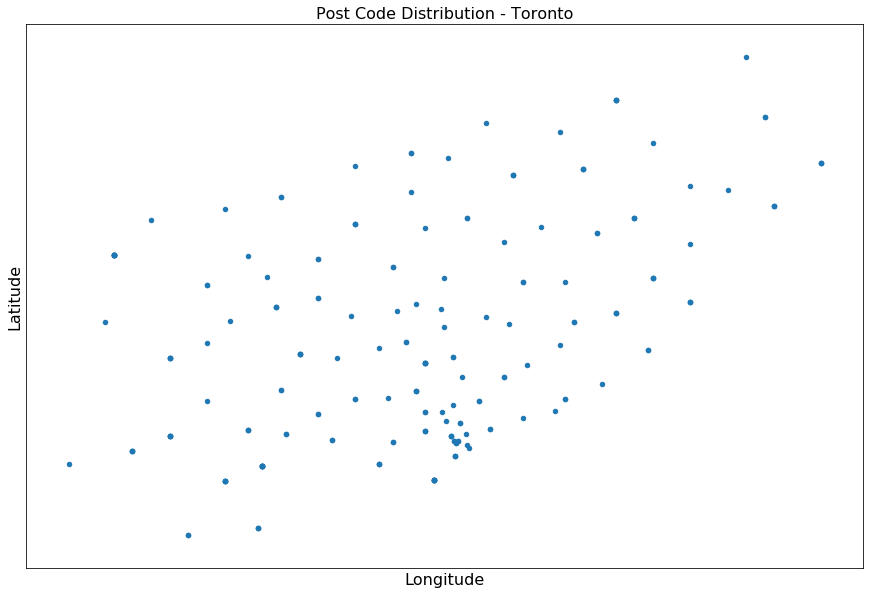

In [197]:
import matplotlib.pyplot as plt

X = neighbor_jdf[['Longitude', 'Latitude']]

scatter_plot = X.plot.scatter(x='Longitude', 
               y='Latitude',  
               fontsize = 16,
               figsize=(15, 10))

scatter_plot.set_xticks([])
scatter_plot.set_yticks([])
plt.xlabel('Longitude', fontsize=16)
plt.ylabel('Latitude', fontsize=16)
scatter_plot.set_title('Post Code Distribution - Toronto', fontsize=16)
scatter_plot.set_yticklabels(labels = 'Latitude', fontdict={'fontsize': 20})
plt.show()

## 8. Clustering the place using kMeans

In [240]:
# coding:utf-8

import sys
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

X = neighbor_jdf[['Longitude', 'Latitude']]

#Define a kMean function:
def kMeans_func(X, clusters=2):
    kmeans = KMeans(n_clusters=clusters)
    kmeans.fit(X)
    return kmeans.labels_

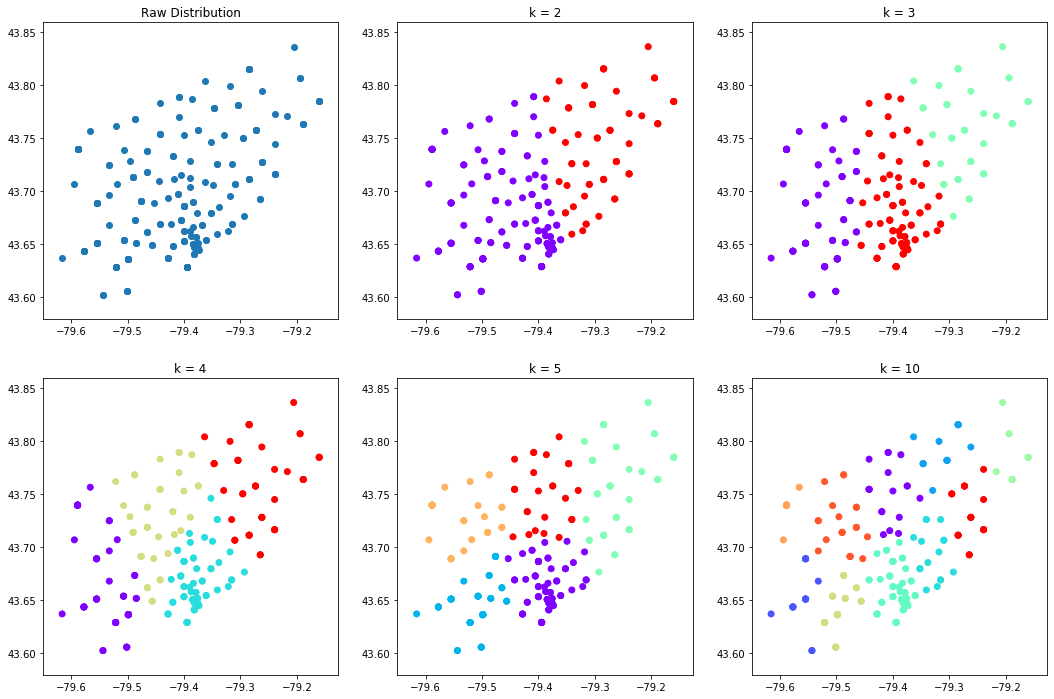

In [248]:
#Plot the kMean Results with different k value:
plt.figure(figsize=(18,12))
#plt.axis([0, 5, 0, 5])
plt.grid(True)

ax1 = plt.subplot(2, 3, 1)
plt.scatter(neighbor_jdf['Longitude'],neighbor_jdf['Latitude'])
ax1.set_title("Raw Distribution")

ax2 = plt.subplot(2, 3, 2)
plt.scatter(neighbor_jdf['Longitude'],neighbor_jdf['Latitude'], c=kMeans_func(X, clusters=2), cmap='rainbow')
ax2.set_title("k = 2")

ax3 = plt.subplot(2, 3, 3)
plt.scatter(neighbor_jdf['Longitude'],neighbor_jdf['Latitude'], c=kMeans_func(X, clusters=3), cmap='rainbow')
ax3.set_title("k = 3")

ax4 = plt.subplot(2, 3, 4)
plt.scatter(neighbor_jdf['Longitude'],neighbor_jdf['Latitude'], c=kMeans_func(X, clusters=4), cmap='rainbow')
ax4.set_title("k = 4")

ax5 = plt.subplot(2, 3, 5)
plt.scatter(neighbor_jdf['Longitude'],neighbor_jdf['Latitude'], c=kMeans_func(X, clusters=5), cmap='rainbow')
ax5.set_title("k = 5")

ax6 = plt.subplot(2, 3, 6)
plt.scatter(neighbor_jdf['Longitude'],neighbor_jdf['Latitude'], c=kMeans_func(X, clusters=10), cmap='rainbow')
ax6.set_title("k = 10")

plt.show()

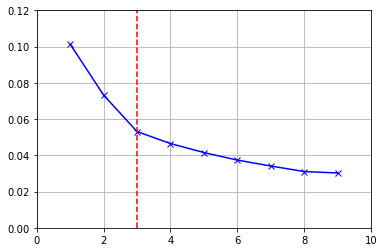

k =3 is the best as k value for kMeans clustering!


In [249]:
K = range(1, 10)
meandistortions = []
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    # 求kmeans的成本函数值
    meandistortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

plt.figure()
plt.axis([0, 10, 0, 0.12])
plt.grid(True)
plt.plot(K, meandistortions, 'bx-')
plt.axvline(x=3, color='r', linestyle='--')
plt.show()

print ('According to the k =3 is the best as k value for kMeans clustering!')

# According to the Elbow method, k=3 is the best choice!

### Thank you for reviewing this notebook!

<hr>

[MIT License](https://bigdatauniversity.com/mit-license/).